In [2]:
# Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import LSTM, Dense
from keras.utils import plot_model

In [3]:
##Downloading the data from yfiance

ticker = 'AMZN'

amazon = yf.download(ticker, start="2020-01-01", end="2023-12-01")

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Print the number of instances (rows) and attributes (columns) in the DataFrame
print('Number of instances = %d' % (amazon.shape[0]))
print('Number of attributes = %d' % (amazon.shape[1]))
amazon.head(15)

Number of instances = 986
Number of attributes = 6


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
2020-01-09,95.494499,95.890999,94.790001,95.052498,95.052498,63346000
2020-01-10,95.268501,95.347000,94.000000,94.157997,94.157997,57074000
2020-01-13,94.565498,94.900002,94.040001,94.565002,94.565002,55616000
2020-01-14,94.293999,94.355499,92.927498,93.472000,93.472000,68818000


In [5]:
##data describe
amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,986.000000,986.000000,986.000000,986.000000,986.000000,9.860000e+02
mean,137.006375,138.792059,135.115492,136.960512,136.960512,7.596369e+07
std,27.794168,27.828831,27.623698,27.682798,27.682798,3.382407e+07
min,82.075500,83.480003,81.301498,81.820000,81.820000,2.237840e+07
25%,113.330002,115.507502,111.469999,113.692499,113.692499,5.360385e+07
50%,140.010002,141.849251,137.724998,139.400505,139.400505,6.634565e+07
75%,161.437374,163.152630,159.540371,161.315002,161.315002,8.771270e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08


In [6]:
#Finding null values for the data
print('Number of missing values:')
for col in amazon.columns:
    print('\t%s: %d' % (col,amazon[col].isna().sum()))

Number of missing values:
	Open: 0
	High: 0
	Low: 0
	Close: 0
	Adj Close: 0
	Volume: 0


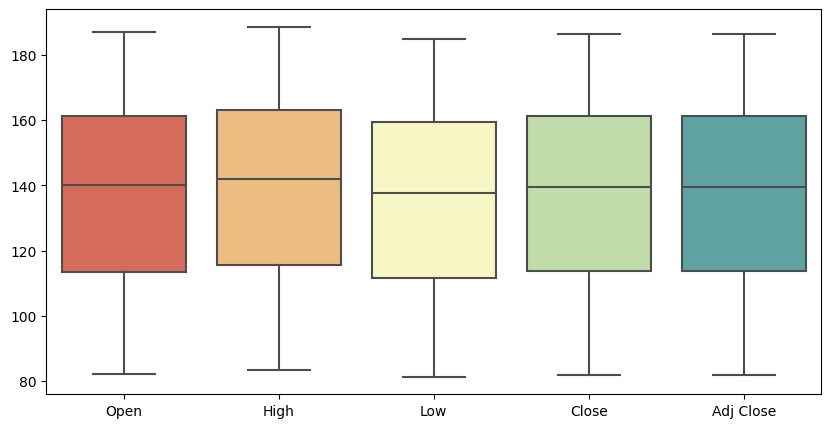

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(data=amazon.drop("Volume",axis=1),palette="Spectral")
plt.show()

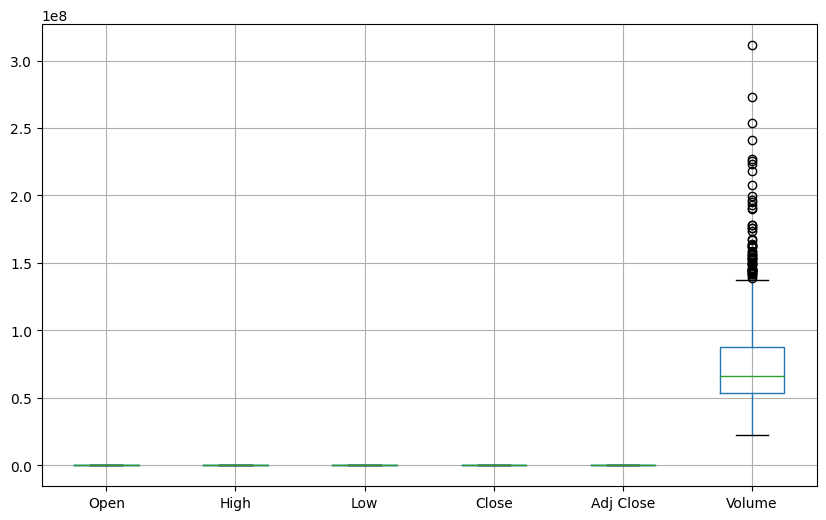

In [8]:
amazon.boxplot(figsize=(10,6))
plt.show()

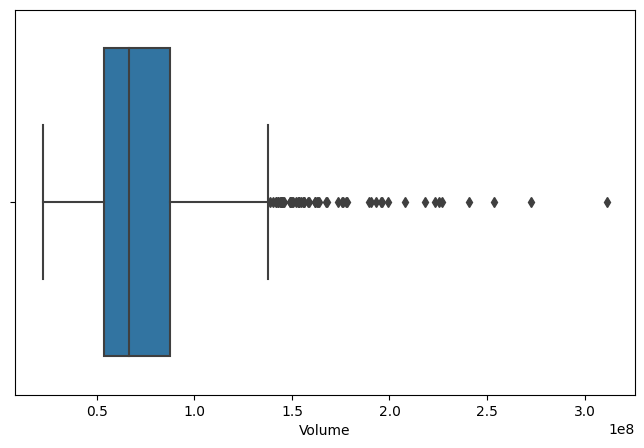

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x=amazon['Volume'])
plt.show()


In [10]:
#Finding number of duplicates
duplicates = amazon.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


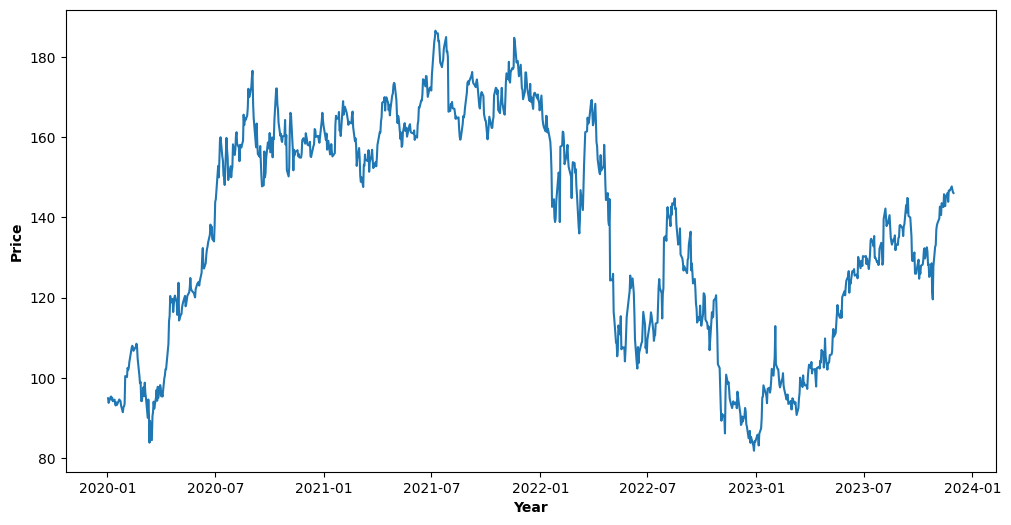

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(amazon['Close'])
plt.xlabel('Year',fontweight='bold', fontsize=10)
plt.ylabel('Price',fontweight='bold', fontsize=10)
plt.show()

In [12]:
# Function for data preprocessing
def preprocess_amazon_stock_data(a):
    # Apply MinMax scaling to normalize closing prices for Amazon stock
    scaler = MinMaxScaler()
    scaled_close_prices = scaler.fit_transform(a['Close'].values.reshape(-1, 1))
    return scaled_close_prices, scaler

In [13]:
# Function to create sequences for LSTM model
def create_lstm_sequences(data, sequence_length):
    # Create sequences and corresponding targets for LSTM model
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

In [14]:
# Function to build and train CNN model using Keras for Amazon stock
def build_and_train_cnn_model(sequence_length):

    # Build CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    #model summary
    model.summary()
    return model

In [15]:
# Function to build and train LSTM model using Keras for Amazon stock
def build_and_train_amazon_lstm_model(sequence_length):
    # Build LSTM model architecture using Keras for Amazon stock
    model = Sequential()
    model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(LSTM(units=50,activation='relu', return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    return model

In [16]:
# CNN model function for Amazon stock analysis
def amazon_stock_market_analysis_CNN(sequence_length, epochs):

    # Preprocess Amazon stock data with Keras
    scaled_close_prices, scaler = preprocess_amazon_stock_data(amazon)

    # Create sequences for CNN model
    sequences, targets = create_lstm_sequences(scaled_close_prices, sequence_length)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

    # Reshape data for CNN model
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build and train the CNN model with Keras for Amazon stock
    model = build_and_train_cnn_model(sequence_length)
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

    # Make predictions on the test set with Keras
    predictions = model.predict(X_test)

    # Inverse transform the predictions and actual values with Keras
    predictions = scaler.inverse_transform(predictions)
    actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate and print Mean Squared Error
    mse = mean_squared_error(actual_values, predictions)
    print(f'Mean Squared Error for Amazon Stock: {mse}')

    # Plot actual vs. predicted stock prices for Amazon
    plt.figure(figsize=(12, 6))
    plt.plot(actual_values, label='Actual Amazon Stock Price')
    plt.plot(predictions, label='Predicted Amazon Stock Price')
    plt.ylabel('Price',fontweight='bold')
    plt.legend()
    plt.show()

In [17]:
# LSTM model function for Amazon stock analysis
def amazon_stock_market_analysis_LSTM(sequence_length, epochs):
    # Preprocess Amazon stock data with Keras
    scaled_close_prices, scaler = preprocess_amazon_stock_data(amazon)

    # Create sequences for LSTM model
    sequences, targets = create_lstm_sequences(scaled_close_prices, sequence_length)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

    # Reshape data for LSTM model
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build and train the LSTM model with Keras for Amazon stock
    model = build_and_train_amazon_lstm_model(sequence_length)
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

    # Make predictions on the test set with Keras
    predictions = model.predict(X_test)

    # Inverse transform the predictions and actual values with Keras
    predictions = scaler.inverse_transform(predictions)
    actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate and print Mean Squared Error
    mse = mean_squared_error(actual_values, predictions)
    print(f'Mean Squared Error for Amazon Stock: {mse}')

    # Plot actual vs. predicted stock prices for Amazon
    plt.figure(figsize=(12, 6))
    plt.plot(actual_values, label='Actual Amazon Stock Price')
    plt.plot(predictions, label='Predicted Amazon Stock Price')
    plt.ylabel('Price',fontweight='bold')
    plt.legend()
    plt.show()

In [18]:
# Example usage for Amazon stock
sequence_length_amazon = 10
epochs_amazon = 50


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 64)             256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 50)                12850     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 13157 (51.39 KB)
Trainable params: 13157 (51.39 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

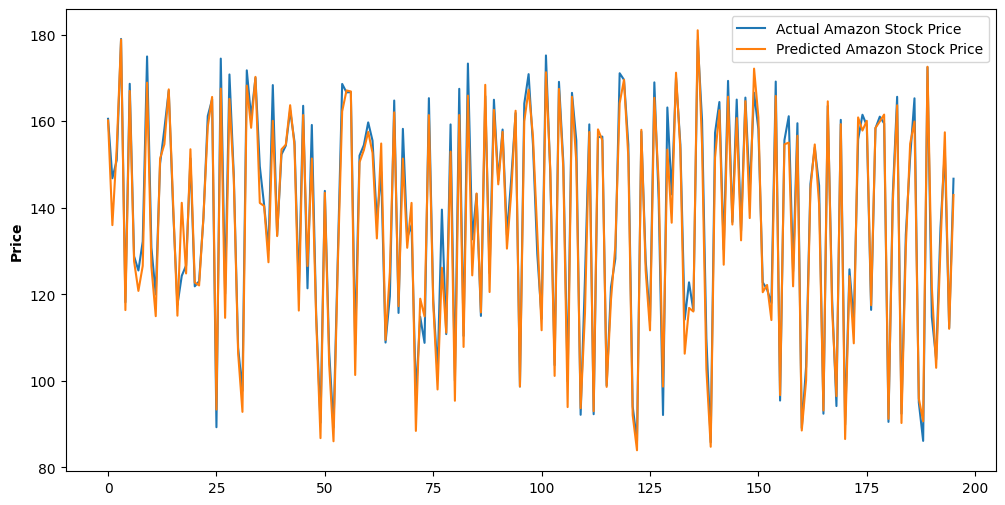

In [19]:
amazon_stock_market_analysis_CNN(sequence_length_amazon, epochs_amazon)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 5s 31ms/step - loss: 0.1249 - val_loss: 0.0232
Epoch 2/50
25/25 [==============================]

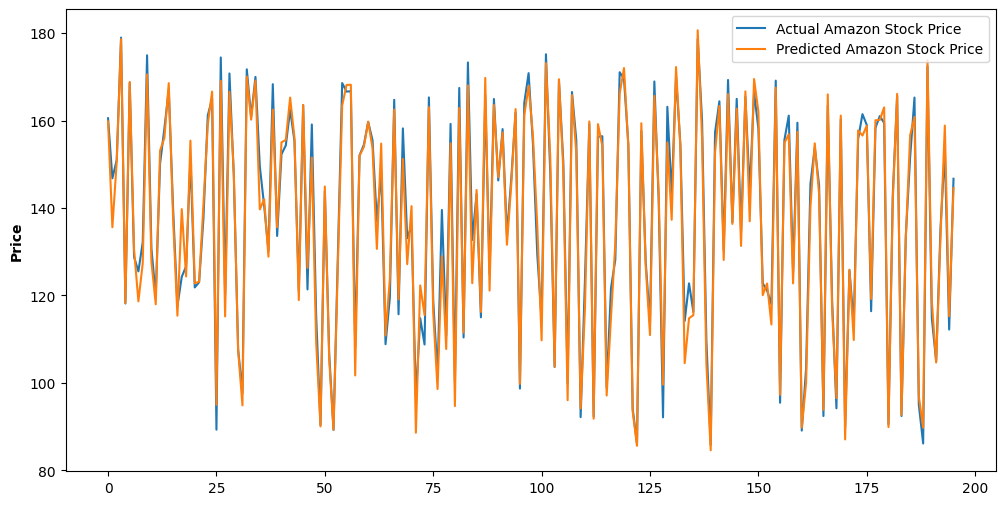

In [20]:
# Analyze Amazon stock using LSTM model
amazon_stock_market_analysis_LSTM(sequence_length_amazon, epochs_amazon)